## Detector model: 3-level system

In [485]:
from sympy import *
#from sympy.physics.matrices import mdft
from sympy.physics.quantum import TensorProduct
from sympy.functions.special.delta_functions import Heaviside
from sympy.physics.quantum.dagger import Dagger

from sympy.stats import ContinuousRV, variance, std

from sympy.plotting import plot, plot3d_parametric_line

import numpy as np

import scipy.integrate

import matplotlib
import matplotlib.pyplot as plt

# matplotlib.rcParams['text.usetex'] = False

# https://matplotlib.org/gallery/mplot3d/lines3d.html?highlight=parametric
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

In [486]:
from IPython.display import display, Latex #, Math

In [487]:
init_printing ()

In [488]:
gamma = Symbol('gamma', real=True, positive=True)
t = Symbol('t', real=True)
tprime = Symbol('t\'', real=True)
omega = Symbol('omega', real=True)
nu = Symbol('nu', real=True)

In [489]:
H = Matrix([
    [0, 0, 1],
    [0, 0, 2],
    [1, 2, 0]
]) / 2

In [490]:
H.eigenvects()

⎡                ⎛         ⎡⎡ -√5  ⎤⎤⎞  ⎛       ⎡⎡ √5 ⎤⎤⎞⎤
⎢                ⎜         ⎢⎢ ──── ⎥⎥⎟  ⎜       ⎢⎢ ── ⎥⎥⎟⎥
⎢⎛      ⎡⎡-2⎤⎤⎞  ⎜         ⎢⎢  5   ⎥⎥⎟  ⎜       ⎢⎢ 5  ⎥⎥⎟⎥
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜-√5      ⎢⎢      ⎥⎥⎟  ⎜√5     ⎢⎢    ⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢1 ⎥⎥⎟, ⎜────, 1, ⎢⎢-2⋅√5 ⎥⎥⎟, ⎜──, 1, ⎢⎢2⋅√5⎥⎥⎟⎥
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜ 2       ⎢⎢──────⎥⎥⎟  ⎜2      ⎢⎢────⎥⎥⎟⎥
⎢⎝      ⎣⎣0 ⎦⎦⎠  ⎜         ⎢⎢  5   ⎥⎥⎟  ⎜       ⎢⎢ 5  ⎥⎥⎟⎥
⎢                ⎜         ⎢⎢      ⎥⎥⎟  ⎜       ⎢⎢    ⎥⎥⎟⎥
⎣                ⎝         ⎣⎣  1   ⎦⎦⎠  ⎝       ⎣⎣ 1  ⎦⎦⎠⎦

In [491]:
U_t = exp(-I*H*t)

In [492]:
psi_0 = Matrix([1, (1+I)/sqrt(2), 0])/sqrt(2)
psi_0

⎡ √2  ⎤
⎢ ──  ⎥
⎢ 2   ⎥
⎢     ⎥
⎢1   ⅈ⎥
⎢─ + ─⎥
⎢2   2⎥
⎢     ⎥
⎣  0  ⎦

In [493]:
unitary_psi_t = U_t @ psi_0

In [494]:
unitary_psi_t

⎡       ⎛ √5⋅ⅈ⋅t        -√5⋅ⅈ⋅t ⎞                                        ⎤
⎢       ⎜ ──────        ────────⎟                                        ⎥
⎢       ⎜   2              2    ⎟           ⎛ √5⋅ⅈ⋅t        -√5⋅ⅈ⋅t ⎞    ⎥
⎢       ⎜ℯ         4   ℯ        ⎟           ⎜ ──────        ────────⎟    ⎥
⎢    √2⋅⎜─────── + ─ + ─────────⎟           ⎜   2              2    ⎟    ⎥
⎢       ⎝   10     5       10   ⎠   ⎛1   ⅈ⎞ ⎜ℯ         2   ℯ        ⎟    ⎥
⎢    ──────────────────────────── + ⎜─ + ─⎟⋅⎜─────── - ─ + ─────────⎟    ⎥
⎢                 2                 ⎝2   2⎠ ⎝   5      5       5    ⎠    ⎥
⎢                                                                        ⎥
⎢     ⎛ √5⋅ⅈ⋅t        -√5⋅ⅈ⋅t ⎞                                          ⎥
⎢     ⎜ ──────        ────────⎟                                          ⎥
⎢     ⎜   2              2    ⎟           ⎛   √5⋅ⅈ⋅t          -√5⋅ⅈ⋅t ⎞  ⎥
⎢     ⎜ℯ         2   ℯ        ⎟           ⎜   ──────          ────────⎟  ⎥
⎢  √2⋅⎜─────── - ─ + ────

In [495]:
prob_t = Matrix([0, 0, 0])
for i in 0, 1, 2:
    prob_t[i] = abs(unitary_psi_t[i])**2

In [496]:
prob_t

⎡      √5⋅ⅈ⋅t                                                                 
⎢      ──────                                                                 
⎢        2          √5⋅ⅈ⋅t    √5⋅ⅈ⋅t                   -√5⋅ⅈ⋅t    -√5⋅ⅈ⋅t     
⎢3⋅√2⋅ℯ         √2⋅ℯ         ℯ         7⋅√2   9    √2⋅ℯ          ℯ          3⋅
⎢──────────── + ────────── + ─────── - ──── + ── + ─────────── + ──────── + ──
⎢     50           100          40      50    20       100          40        
⎢                                                                             
⎢        √5⋅ⅈ⋅t                                                               
⎢        ──────                                                               
⎢          2          √5⋅ⅈ⋅t    √5⋅ⅈ⋅t                 -√5⋅ⅈ⋅t    -√5⋅ⅈ⋅t     
⎢  3⋅√2⋅ℯ         √2⋅ℯ         ℯ         √2   3    √2⋅ℯ          ℯ          3⋅
⎢- ──────────── + ────────── + ─────── + ── + ── + ─────────── + ──────── - ──
⎢       50            25          10     25   10    

In [497]:
simplify(
    prob_t[0] + prob_t[1] + prob_t[2]
)

In [498]:
unitary_psi_n = lambdify(t, unitary_psi_t, 'numpy')
_prob_n = lambdify(t, prob_t, 'numpy')
def prob_n(_t):
    return np.real(_prob_n(_t))

In [499]:
def phase_color(_z):
    return np.sin(np.angle(_z))

<!--
#### Complex argument color code
* <span style="color: #fe0">__Yellow__</span> (or generally the "highest"): imaginary, positive
* <span style="color: #086">__Green__ </span> (or generally the "midrange"): real
* <span style="color: #408">__Purple__</span> (or generally the "lowest"): imaginary, negative
-->

In [500]:
TMIN, TMAX = 0, 4*pi/sqrt(5) # one and a half periods, for graphical purposes...
TMIN_N, TMAX_N = float(TMIN), float(TMAX)

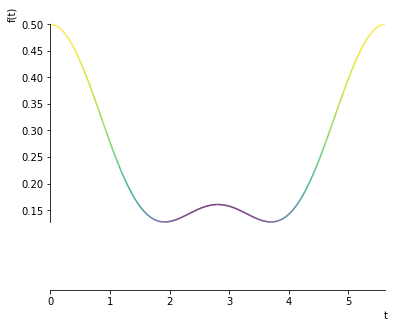

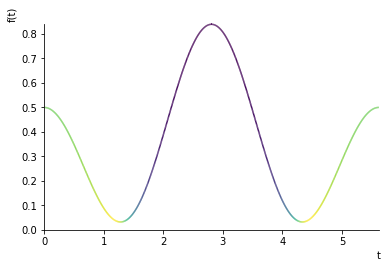

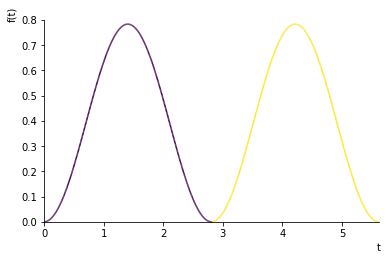

In [501]:
for i in 0, 1, 2:
    pl = plot(
        prob_t[i],
        (t, TMIN, TMAX),
        adaptive=False, nb_of_points=1000, show=False)
    # Need the numeric version to customize color function
    pl[0].line_color = lambda _t: phase_color( unitary_psi_n(_t)[i] )
    pl.axis_center = (0, 0)
    pl.show()

In [502]:
NPLOTPOINTS = 1000

In [503]:
times = np.linspace(TMIN_N, TMAX_N, num=NPLOTPOINTS)
times_extended = np.linspace(TMIN_N, 100*TMAX_N, num=NPLOTPOINTS)

In [504]:
probs = np.zeros((3, NPLOTPOINTS))

In [505]:
for i in 0, 1, 2:
    probs[i] = prob_n(times)[i]

In [506]:
# Avoid *tiny* negative numbers, just out of numeric approximation, which will cause problems later,
# when their value is in fact juzt zero.
probs = np.round(probs, decimals=12)

In [507]:
UNISYM = {
    'psi': u'\u03C8',
    '^2' : u'\u00B2'
}
PROB_LABELS     = ['', '', '']
PROB_AMP_LABELS = ['', '', '']
                
for i in 0, 1, 2:
    PROB_AMP_LABELS[i] = '<' + str(i) + '|' + UNISYM['psi'] + '>'
    PROB_LABELS[i]     = '|' + PROB_AMP_LABELS[i] + '|' + UNISYM['^2']

https://matplotlib.org/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py

In [508]:
prob_stack = np.vstack(probs)

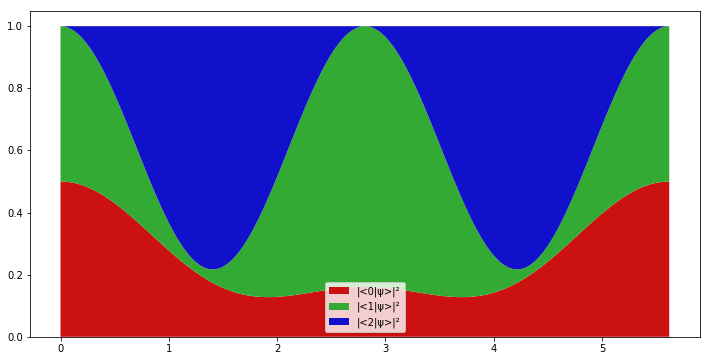

In [509]:
labels = PROB_LABELS
colors = ["#cc1111", "#33aa33", "#1111cc"]

fig, ax = plt.subplots(figsize=(12, 6))
ax.stackplot(times, probs[0], probs[1], probs[2], labels=labels, colors=colors)
ax.legend(loc='lower center')
plt.show()

In [510]:
rgbs = []
for i in range(NPLOTPOINTS):
    rgbs.append(
        (
            probs[0][i],
            probs[1][i],
            probs[2][i]
        )
    )

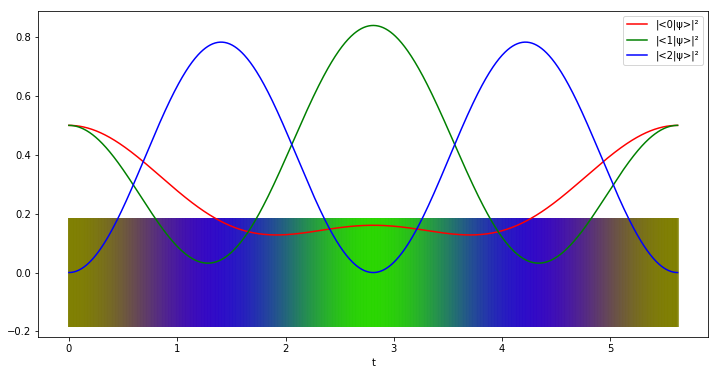

In [511]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('t')
ax.scatter(times, np.zeros(NPLOTPOINTS),
            c=rgbs, marker='|', s=12000)

# "virtual", don't really want to show, only for legend
_c = ['r', 'g', 'b']
for i in 0, 1, 2:
    ax.plot(
        times, probs[i],
        c=_c[i],
        #linewidth=1,
    )
    
ax.legend(
    PROB_LABELS,
    loc='upper right'
)

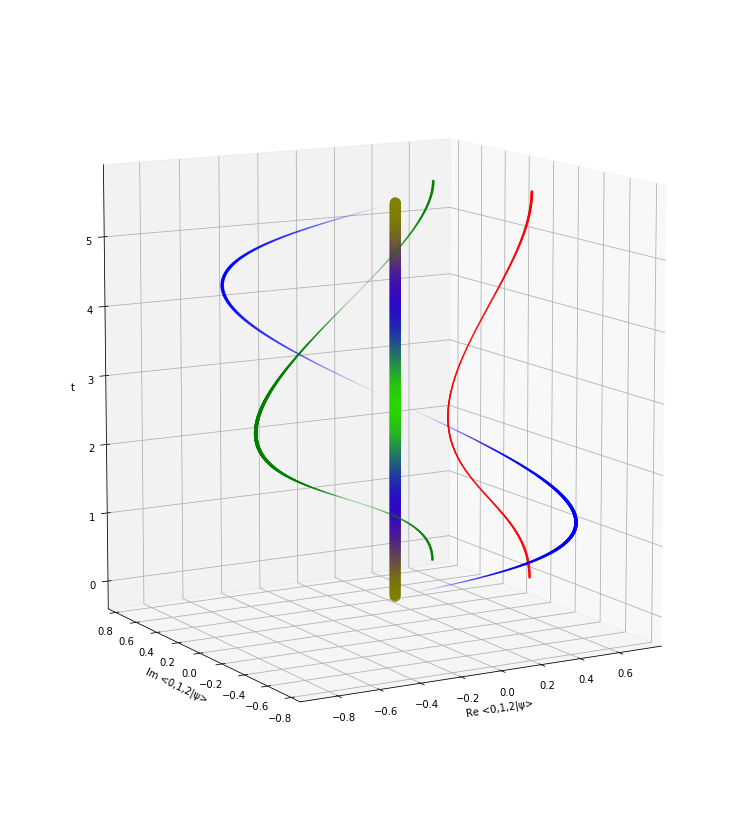

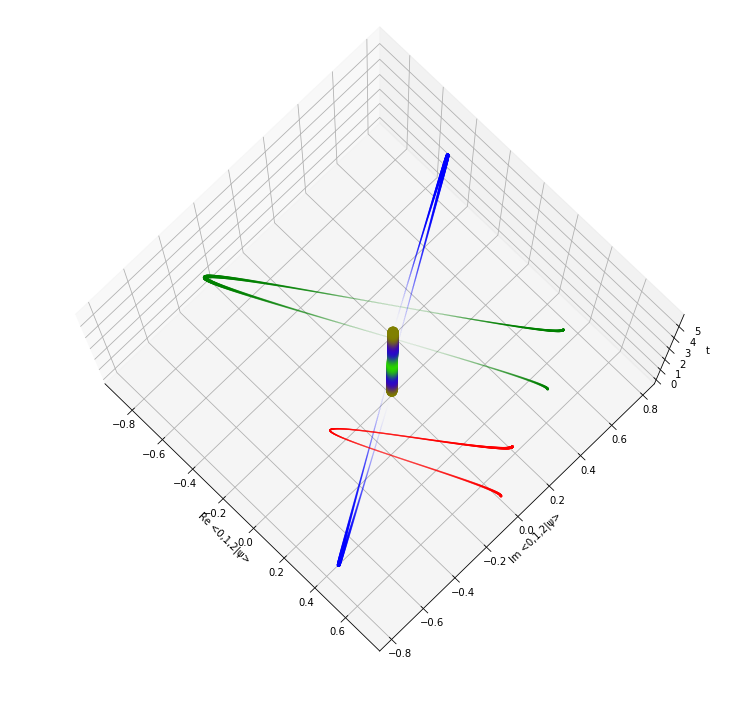

In [512]:
# 3D parametric plot
for (vertical_angle, horizontal_angle, height, width) in (10, -120, 15, 13), (80, -45, 13, 13):
    fig = plt.figure(figsize=(width, height))


    ax = fig.gca(projection='3d')

    ax.view_init(vertical_angle, horizontal_angle) # rotate 3d point of view

    ax.set_xlabel('Re <0,1,2|\u03C8>')
    ax.set_ylabel('Im <0,1,2|\u03C8>')
    ax.set_zlabel('t')

    ax.scatter(
        np.zeros(NPLOTPOINTS, dtype=np.float),
        np.zeros(NPLOTPOINTS, dtype=np.float),
        times,

        c = rgbs,
        s = 100
    )
    for i in 0, 1, 2:
        ax.scatter(
            np.real(unitary_psi_n(times)[i][0]),
            np.imag(unitary_psi_n(times)[i][0]),
            times,

            marker = '.',
            #depthshade=False,
            s = (probs[i]**2)*40,
            c = _c[i]
        )

## Complex potential (detection by absorption)

Need to switch everything to numeric.

In [513]:
from scipy.linalg import expm, norm

In [514]:
H_n = np.array(H).astype(np.complex)

In [515]:
H_n

array([[0. +0.j, 0. +0.j, 0.5+0.j],
       [0. +0.j, 0. +0.j, 1. +0.j],
       [0.5+0.j, 1. +0.j, 0. +0.j]])

In [516]:
GAMMA = 0.005
psi_0_n = np.array(psi_0.T).astype(np.complex)[0]

In [517]:
psi_0_n

array([0.70710678+0.j , 0.5       +0.5j, 0.        +0.j ])

In [518]:
def D(_gamma=GAMMA):
    # no 1/2 factor, absorbed in the _gamma in the matrix here
    return np.array([
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, _gamma]
    ], dtype=np.complex)

In [519]:
D()

array([[0.   +0.j, 0.   +0.j, 0.   +0.j],
       [0.   +0.j, 0.   +0.j, 0.   +0.j],
       [0.   +0.j, 0.   +0.j, 0.005+0.j]])

In [520]:
def K(_gamma=GAMMA):
    return H_n - 1j*D(_gamma)

In [521]:
K()

array([[0. +0.j   , 0. +0.j   , 0.5+0.j   ],
       [0. +0.j   , 0. +0.j   , 1. +0.j   ],
       [0.5+0.j   , 1. +0.j   , 0. -0.005j]])

In [522]:
def B(_t, _gamma=GAMMA):
    return expm(-1j*K(_gamma)*_t)

In [523]:
B(0)

array([[1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j]])

In [524]:
def non_unitary_psi(_t, _gamma=GAMMA):
    return B(_t, _gamma) @ psi_0_n

In [525]:
evolution = np.zeros((3, NPLOTPOINTS), dtype=np.complex)
evolution_extended = np.zeros((3, NPLOTPOINTS), dtype=np.complex)

for i in 0, 1, 2:
    _iter = (non_unitary_psi(_t)[i] for _t in times)
    _iter_extended = (non_unitary_psi(_t)[i] for _t in times_extended)

    evolution[i] = np.fromiter(_iter, np.complex)
    evolution_extended[i] = np.fromiter(_iter_extended, np.complex)

_iter_norm = (norm(non_unitary_psi(_t)) for _t in times)
norms = np.fromiter(_iter_norm, np.float)

_iter_norm_extended = (norm(non_unitary_psi(_t)) for _t in times_extended)
norms_extended = np.fromiter(_iter_norm_extended, np.float)

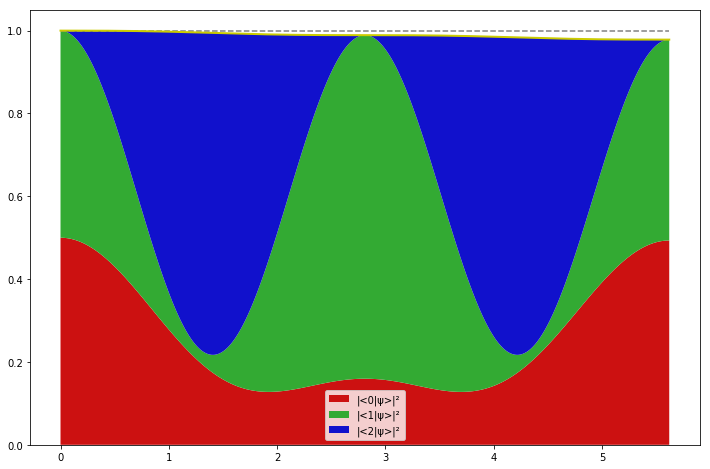

In [568]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(times, np.ones(NPLOTPOINTS), c='grey', linestyle='dashed')

ax.plot(times, norms**2, c='#cccc00', linewidth=2)

ax.stackplot(
    times,
    np.abs(evolution[0])**2,
    np.abs(evolution[1])**2,
    np.abs(evolution[2])**2,
    
    labels=labels, colors=colors
)

ax.legend(loc='lower center')

plt.show()

In [576]:
# loss of normalization, or integral of antiderivative...
bayesian_denominator_nonpw = 1 - norm(evolution.T[NPLOTPOINTS-1])**2

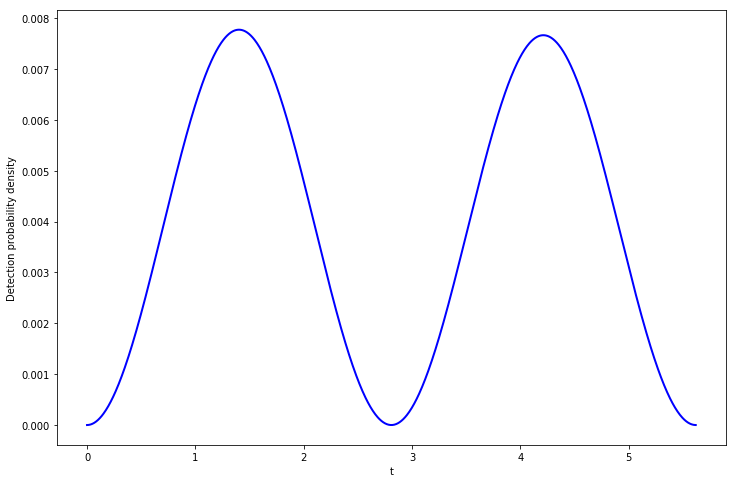

In [558]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlabel('t')
ax.set_ylabel('Detection probability density')
ax.plot(times, -np.gradient(norms**2, times), c='b', linewidth=2)

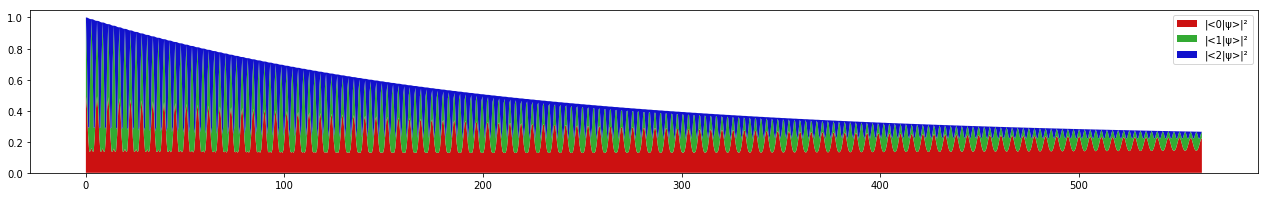

In [528]:
labels = PROB_LABELS
colors = ["#cc1111", "#33aa33", "#1111cc"]

fig, ax = plt.subplots(figsize=(22, 3))

ax.stackplot(
    times_extended,
    np.abs(evolution_extended[0])**2,
    np.abs(evolution_extended[1])**2,
    np.abs(evolution_extended[2])**2,
    
    labels=labels, colors=colors
)

ax.legend(loc='upper right')

plt.show()

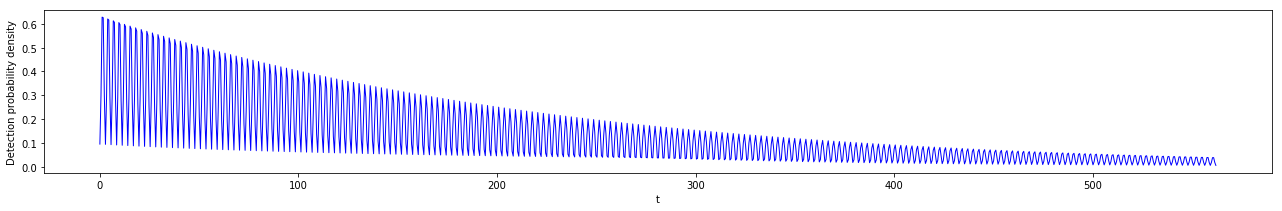

In [529]:
fig, ax = plt.subplots(figsize=(22, 3))
ax.set_xlabel('t')
ax.set_ylabel('Detection probability density')
ax.plot(times_extended, -np.gradient(norms_extended**2, times), c='b', linewidth=1)

## Page-Wootters

In [530]:
from scipy.linalg import dft, norm, expm, det, inv

In [531]:
# Dimension of the system, or the spatial/"ordinary" Hilbert space
NS = 3
# Number of levels of the clock aka dimension of Time Hilbert space
NT = 32
# "Period"
DT = TMAX_N  # assume we start with time 0

T = DT * np.diag(np.arange(NT)) / NT

In [532]:
F = dft(NT, scale='sqrtn').conj()
F_dagger = F.conj().T

In [533]:
Omega = F @ T @ F_dagger * 2*np.pi * NT / DT**2

In [534]:
J = np.kron(Omega, np.eye(3)) + np.kron(np.eye(NT), H_n)

In [535]:
eigenvalues, eigenvectors = np.linalg.eig(J)

In [536]:
eigenvectors = eigenvectors.T

In [537]:
eigenvectors_normalized_in_S = np.empty((NT*NS, NT*NS), dtype=complex)
for i in range(NT*NS):
    eigenvectors_normalized_in_S[i] = eigenvectors[i] / norm(eigenvectors[i][:3])

In [538]:
unitary_histories = np.empty((NT*NS, NT*NS), dtype=complex)
for i in range(NT*NS):
    unitary_histories[i] = \
        expm(np.kron( -1j*T*eigenvalues[i], np.eye(NS) )) @ \
        eigenvectors_normalized_in_S[i]

In [539]:
# Only implemented for NS=3
def find_linear_independent_initial(eigenvectors=eigenvectors_normalized_in_S):
    best_i, best_j, best_k = -1, -1, -1
    best_det = 0
    best_states = np.array([
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]
    ])
    for i in range(NT*NS):
        for j in range(i, NT*NS):
            for k in range(j, NT*NS):
                # this normalization is not necessary if default
                # eigenvectors=eigenvectors_normalized_in_S
                # is given
                si = eigenvectors[i][:3]
                si = si / norm(si)
                sj = eigenvectors[j][:3]
                sj = sj / norm(sj)
                sk = eigenvectors[k][:3]
                sk = sk / norm(sk)
                states = np.array([
                    si,
                    sj,
                    sk
                ])
                _det = det(states)
                if abs(abs(_det)-1.0) < abs(abs(best_det) - 1.0):
                    best_det = _det
                    best_i, best_j, best_k = i, j, k
                    best_states = states
                if abs(abs(_det)-1.0) == 0:
                    return best_i, best_j, best_k, best_det
        percent = int(100 * (i + 1) / (NT*NS))
        print(
            str(percent) + '% scanned' + "\tabs(best_det) = " + str(abs(best_det)),
            end="\r", flush=True)
        
    return best_i, best_j, best_k, best_det


In [540]:
best_i, best_j, best_k, best_det = find_linear_independent_initial()

In [541]:
(best_i, best_j, best_k), abs(best_det)

In [542]:
states = np.array([
    unitary_histories[best_i][:NS],
    unitary_histories[best_j][:NS],
    unitary_histories[best_k][:NS]
])
assert(np.round(abs(det(states)), decimals=3) == 1.0)
# Find what linear combination would bring to the desired initial state psi_0_n
coeffs = inv(states.T) @ psi_0_n

In [543]:
np.round(coeffs, decimals=3)

array([ 0.11 +0.248j, -0.04 +0.65j ,  0.699+0.001j])

In [544]:
history = coeffs.dot(np.array([
    unitary_histories[best_i],
    unitary_histories[best_j],
    unitary_histories[best_k]
]))

In [545]:
np.round(history[:NS], decimals=3)

array([0.707-0.j , 0.5  +0.5j, 0.   +0.j ])

In [546]:
np.round(history[:NS] - psi_0_n, decimals=12)

array([ 0.-0.j, -0.+0.j,  0.+0.j])

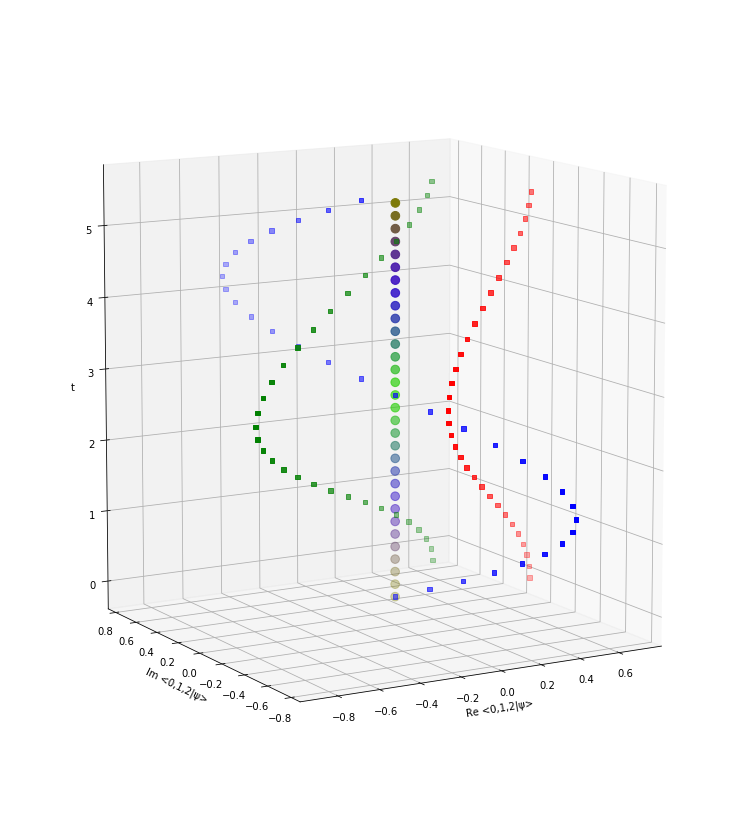

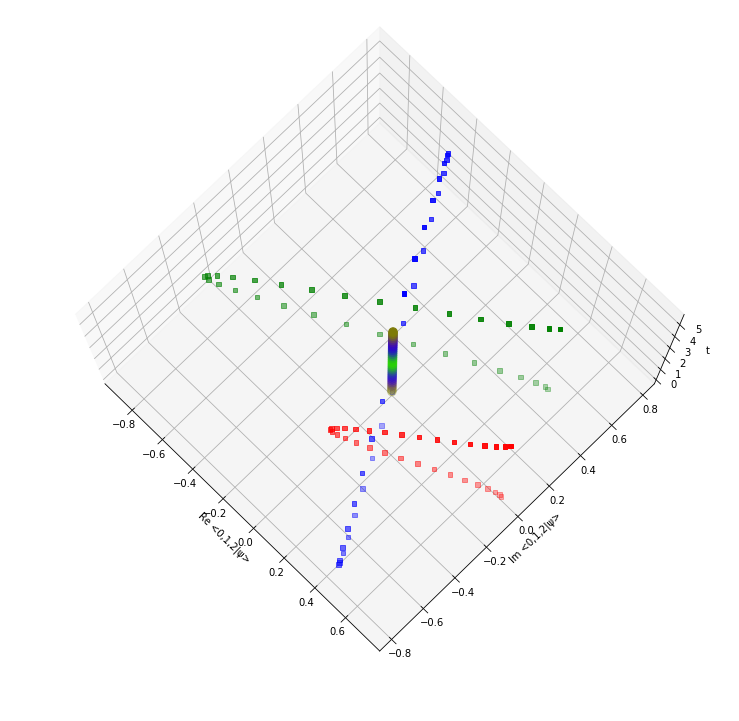

In [547]:
# 3D parametric plot

times_discrete = np.diag(T)

psi = history.reshape((-1,NS)).T

for (vertical_angle, horizontal_angle, height, width) in (10, -120, 15, 13), (80, -45, 13, 13):
    fig = plt.figure(figsize=(width, height))


    ax = fig.gca(projection='3d')

    ax.view_init(vertical_angle, horizontal_angle) # rotate 3d point of view

    ax.set_xlabel('Re <0,1,2|\u03C8>')
    ax.set_ylabel('Im <0,1,2|\u03C8>')
    ax.set_zlabel('t')

    ax.scatter(
        np.zeros(NT, dtype=np.float),
        np.zeros(NT, dtype=np.float),
        times_discrete,
    
        c = (abs(psi.T)**2),
        s = 75,
        marker='o'
    )
    _c = ['r', 'g', 'b']
    for i in range(NS):
        ax.scatter(
            np.real(
                psi[i]
            ),
            np.imag(
                psi[i]
            ),
            times_discrete,

            marker = 's',
            #depthshade=False,
            #s = abs(_psi[i]**2)*60,
            s = 20,
            c = _c[i]
        )

## TOA prob as in Maccone/Sacha arXiv:1810.12869
_Adapted from $\S$ "Time of arbitrary event"._

See also [`detect-gentle.ipynb`](detect-gentle.ipynb).

In [548]:
def t_eigenstate(n):
    v = np.zeros(32, dtype=np.complex)
    v[n] = 1
    return v

In [549]:
arrived_state = np.array([0, 0, 1])

In [550]:
def tn_ox_arrived(n):
    return np.kron(t_eigenstate(n), arrived_state)

In [551]:
history_normalized = history / norm(history)  ## normalized in H_T \otimes H_S

In [552]:
def joint_prob(n):
    return np.abs(tn_ox_arrived(n) @ history_normalized)**2

In [553]:
X = np.arange(NT)
iterable = (joint_prob(n) for n in X)
Y = np.fromiter(iterable, float)

In [554]:
# A "time bin"
X = X * (DT/NT) # real time
Y = Y / (DT/NT) # probability _density_

In [555]:
bayes_denominator = np.sum(Y * (DT/NT))
Y = Y / bayes_denominator

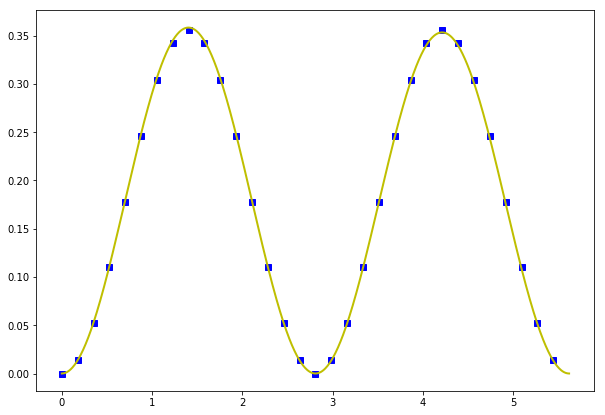

In [582]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(X, Y, 'bs')
ax.plot(times, -np.gradient(norms**2, times) / bayesian_denominator_nonpw, c='y', linewidth=2)
plt.show()